In [1]:
import fastf1
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import matplotlib as mpl

In [2]:
year = 2023
race = "monaco"

drivers = ["ALB", "ALO", 
            "BOT", "DEV", 
            "GAS", "HAM", 
            "HUL", "LEC", 
            "MAG", "NOR", 
            "OCO", "PER", 
            "PIA", "RUS", 
            "SAI", "SAR", 
            "STR", "TSU", 
            "VER", "ZHO"]

In [9]:
session = fastf1.get_session(year, race, "Q")
session.load()

lap = session.laps.pick_driver("VER").pick_fastest()
tel = lap.get_telemetry()

x = np.array(tel['X'].values)
y = np.array(tel['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
brake = tel['Brake'].to_numpy().astype(float)

type(brake)

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '4', '44', '18', '14', '27', '10', '23', '63', '31', '81', '77', '11', '22', '24', '2', '20', '21']


numpy.ndarray

In [6]:
def plot_fastest_lap_brake_visualization(drivers, year, race):

    session = fastf1.get_session(year, race, "Q")
    session.load()

    for driver in drivers:
        lap = session.laps.pick_driver(driver).pick_fastest()
        tel = lap.get_telemetry()

        x = np.array(tel['X'].values)
        y = np.array(tel['Y'].values)

        points = np.array([x, y]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        brake = tel['Brake'].to_numpy().astype(float)

        cmap = cm.get_cmap('Paired')
        lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
        lc_comp.set_array(brake)
        lc_comp.set_linewidth(4)

        fig, ax = plt.subplots()
        plt.gca().add_collection(lc_comp)
        plt.axis('equal')
        plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

        title = plt.suptitle(f"Fastest Lap Gear Shift Visualization\n"f"{lap['Driver']} - {session.event['EventName']} {session.event.year}")

        cbar = plt.colorbar(mappable=lc_comp, label="Brake", boundaries=np.arange(1, 10))
        cbar.set_ticks(np.arange(1.5, 9.5))
        cbar.set_ticklabels(np.arange(1, 9))

        plt.legend(bbox_to_anchor=(1.0, 1.02))

        ax.set_facecolor("black")
        fig.set_facecolor("black")

        mpl.rc('text', color='white')
        mpl.rc('axes', labelcolor='white')
        mpl.rc('xtick', color='white')
        mpl.rc('ytick', color='white')

        plt.tight_layout()
        fig.set_dpi(1000)
        plt.savefig(f"{driver}.png")
        plt.show()

core           INFO 	Loading data for Austrian Grand Prix - Qualifying [v3.0.6]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '16', '55', '4', '44', '18', '14', '27', '10', '23', '63', '31', '81', '77', '11', '22', '24', '2', '20', '21']
C:\Users\gakro\AppData\Local\Temp\ipykernel_31220\2693454269.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed 

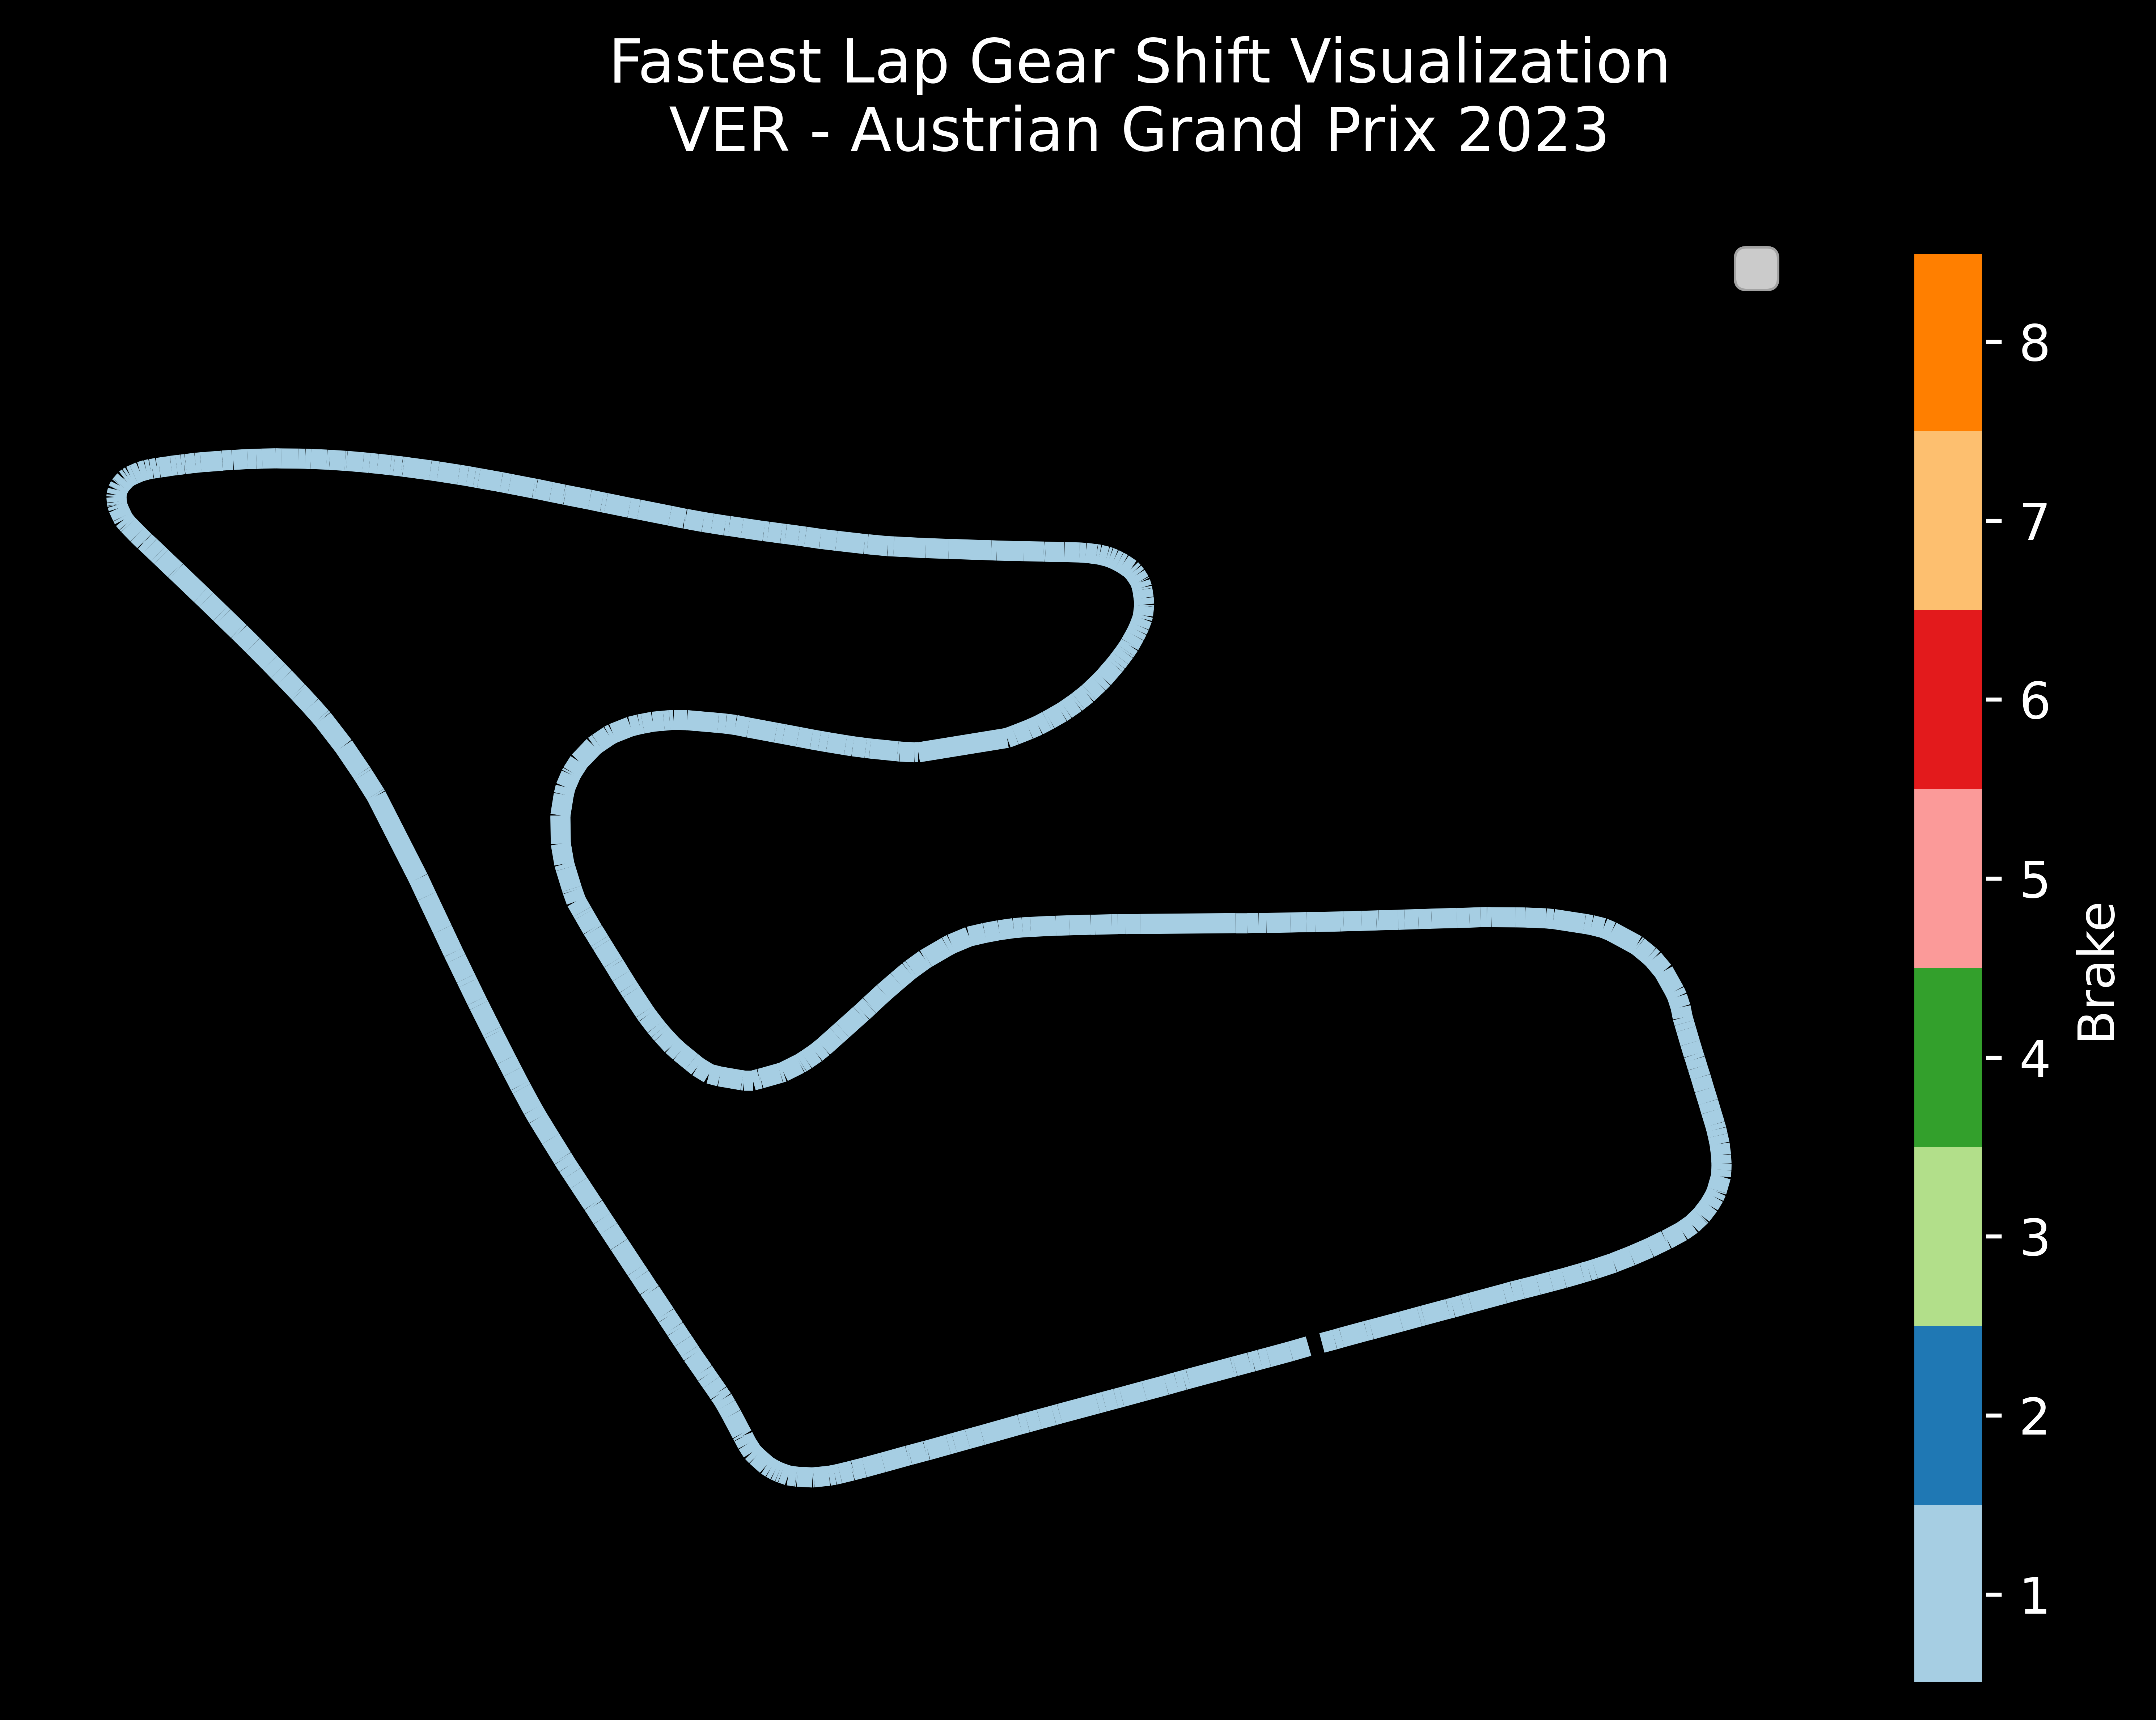

In [7]:
plot_fastest_lap_brake_visualization(["VER"], year, race)